Silhouette Score (k=3): 0.4490


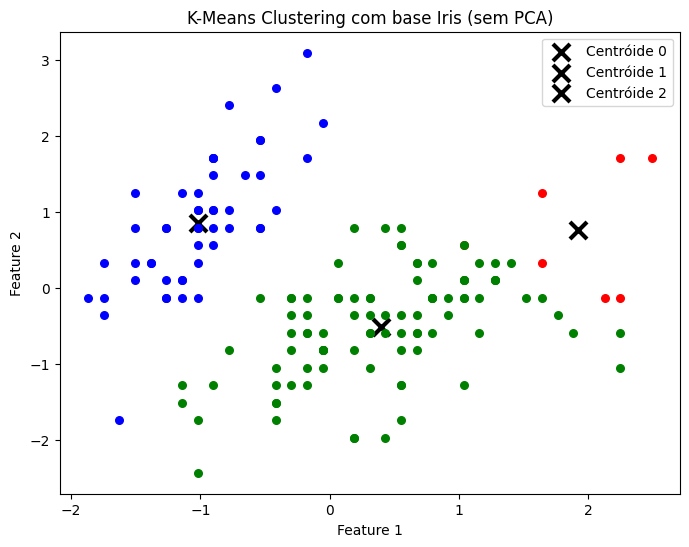

Silhouette Score (k=5): 0.3841


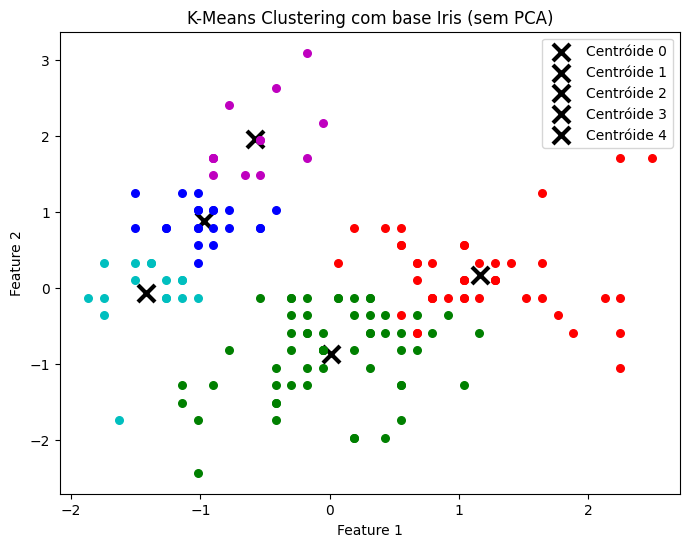

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

class K_Means:

    def __init__(self, k=2, tolerance=0.001, max_iter=500):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance

    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)

    def predict(self, data):
        distances = [self.euclidean_distance(data, self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iterations):
            self.classes = {j: [] for j in range(self.k)}

            for point in data:
                distances = [self.euclidean_distance(point, self.centroids[centroid]) for centroid in self.centroids]
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)

            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis=0)

            isOptimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            if isOptimal:
                break

        self.labels_ = []
        for i in range(len(data)):
            self.labels_.append(self.predict(data[i]))


def main():
    iris = load_iris()
    X = iris.data
    y = iris.target

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    for k in [3,5]:
        k_means = K_Means(k=k)
        k_means.fit(X)

        score = silhouette_score(X, k_means.labels_)
        print(f"Silhouette Score (k={k}): {score:.4f}")

        colors = 10 * ["r", "g", "b", "c", "m", "y"]

        plt.figure(figsize=(8, 6))
        for centroid in k_means.centroids:
            plt.scatter(k_means.centroids[centroid][0], k_means.centroids[centroid][1], marker="x", s=150, linewidths=3, color='black', label=f'Centróide {centroid}')

        for cluster_index in k_means.classes:
            color = colors[cluster_index]
            for point in k_means.classes[cluster_index]:
                plt.scatter(point[0], point[1], color=color, s=30)

        plt.title("K-Means Clustering com base Iris (sem PCA)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()

Silhouette Score (k=3): 0.5113


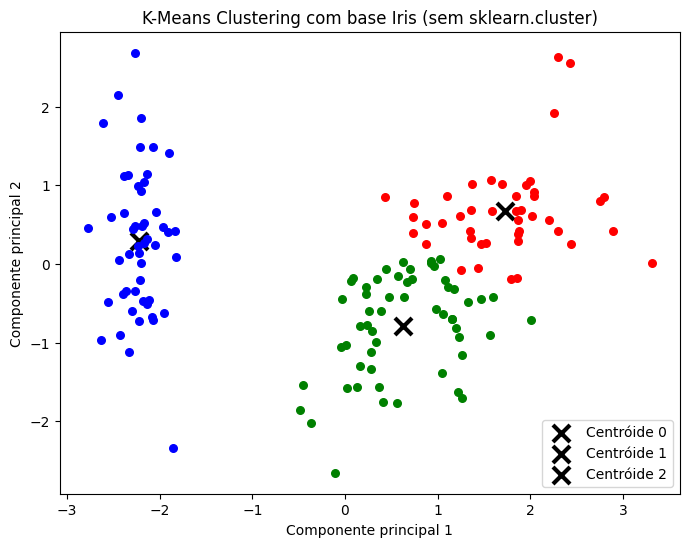

Silhouette Score (k=5): 0.4548


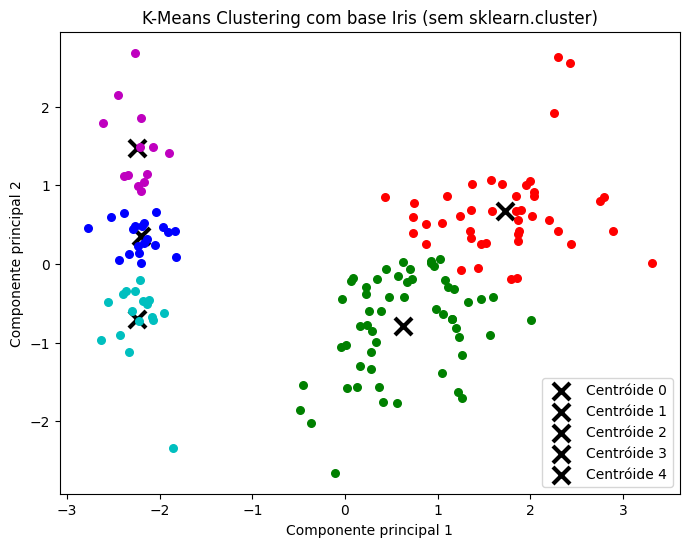

In [19]:
def main():
    iris = load_iris()
    X = iris.data
    y = iris.target

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    for k in [3,5]:
    # k=3
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X)

        k_means = K_Means(k=k)
        k_means.fit(X_2d)

        score = silhouette_score(X_2d, k_means.labels_)
        print(f"Silhouette Score (k={k}): {score:.4f}")

        colors = 10 * ["r", "g", "b", "c", "m", "y"]

        plt.figure(figsize=(8, 6))
        for centroid in k_means.centroids:
            plt.scatter(*k_means.centroids[centroid], marker="x", s=150, linewidths=3, color='black', label=f'Centróide {centroid}')

        for cluster_index in k_means.classes:
            color = colors[cluster_index]
            for point in k_means.classes[cluster_index]:
                plt.scatter(point[0], point[1], color=color, s=30)

        plt.title("K-Means Clustering com base Iris (sem sklearn.cluster)")
        plt.xlabel("Componente principal 1")
        plt.ylabel("Componente principal 2")
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()